## YOLO Detection


In [ ]:
pip install --upgrade shapely

In [ ]:
pip install ultralyticsplus==0.0.28 ultralytics==8.0.43


In [ ]:
from ultralyticsplus import YOLO, render_result
import matplotlib.pyplot as plt
import cv2
import numpy as np

model = YOLO('foduucom/plant-leaf-detection-and-classification')
#set model parameters
model.overrides['conf'] = 0.25  # NMS confidence threshold
model.overrides['iou'] = 0.45  # NMS IoU threshold
model.overrides['agnostic_nms'] = False  # NMS class-agnostic
model.overrides['max_det'] = 1000  # maximum number of detections per image




In [ ]:
image = '/content/photo_2024-06-22_02-21-44.jpg'
image=cv2.imread(image)

results = model.predict(image)



0: 640x640 1 tobacco, 1500.5ms
Speed: 1.5ms preprocess, 1500.5ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


In [ ]:
flag=False
for result in results:
    for box in result.boxes:
        class_id = result.names[box.cls[0].item()]
        if (class_id == "no detections"):
            flag=True
            break

print(flag)

False


In [ ]:

render = render_result(model=model, image=image, result=results[0])

render=np.array(render)
render.shape
cv2.imwrite("yolo.jpg",render)

True

# choose the the biggest box to crop

In [ ]:
res_numpy=np.array(results[0].boxes.xywh)
no_res=len(res_numpy)
res=[w*h for x,y,w,h in (res_numpy)]
box_index=np.argmax(res)
box_index


0

In [ ]:
res_box=np.array(results[0].boxes[box_index].xyxy)
res_box

array([[         11,          32,         105,         200]], dtype=float32)

In [ ]:
x_min=int(res_box[0][0])
y_min=int(res_box[0][1])
x_max=int(res_box[0][2])
y_max=int(res_box[0][3])
box=(x_min,y_min,x_max,y_max)
box

(11, 32, 105, 200)

array([[[174, 230, 211],
        [185, 240, 221],
        [163, 213, 195],
        ...,
        [  0,  52,  42],
        [  0,  58,  47],
        [ 19,  80,  66]],

       [[ 54, 113,  93],
        [ 58, 114,  95],
        [ 51, 106,  87],
        ...,
        [  9,  69,  59],
        [ 17,  74,  65],
        [ 18,  77,  63]],

       [[ 28,  93,  68],
        [ 30,  92,  68],
        [ 44, 102,  78],
        ...,
        [ 30,  87,  78],
        [ 38,  91,  82],
        [ 38,  91,  81]],

       ...,

       [[ 83, 115,  91],
        [ 76, 112,  88],
        [ 72, 110,  88],
        ...,
        [ 63, 102,  87],
        [ 50,  91,  76],
        [ 37,  82,  66]],

       [[ 82, 114,  90],
        [ 76, 112,  88],
        [ 73, 111,  89],
        ...,
        [ 94, 130, 116],
        [ 80, 119, 104],
        [ 56, 101,  85]],

       [[ 81, 113,  89],
        [ 76, 112,  88],
        [ 74, 112,  90],
        ...,
        [123, 159, 145],
        [110, 149, 134],
        [ 88, 131, 116]]], dtype=uint8)
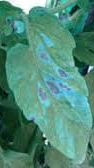

In [ ]:

cropped_image = image[y_min:y_max, x_min:x_max]
cropped_image

In [ ]:
cv2.imwrite("cropped_image.jpg",cropped_image)

True